# Astro 361 Lab 7 - Radio Astronomy

# Brandon Dix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import scipy

In [2]:
#data_folder_1 = '/Users/bhdix/Desktop/lsa-ast361/Work/bhdix/lab7/radio-astronomy/sun_azimuth/'
#data_folder_2 = '/Users/bhdix/Desktop/lsa-ast361/Work/bhdix/lab7/radio-astronomy/sun_elevation/'

data_folder_1 = 'C:/Users/brand/OneDrive/Desktop/sun_azimuth/'
data_folder_2 = 'C:/Users/brand/OneDrive/Desktop/sun_elevation/'
az_files = glob.glob(data_folder_1 + "sun*") #This command grabs all of the files starting with "sun_az" in your data folder.
el_files = glob.glob(data_folder_2 + "sun_el_*") #This command grabs all of the files starting with "sun_az" in your data folder.

az_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
el_files.sort()

In [3]:
#el_files

In [4]:
az_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)

In [5]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)

In [6]:
#print(az_spectra)

In [7]:
#print(el_spectra)

Text(0, 0.5, 'Flux (Counts)')

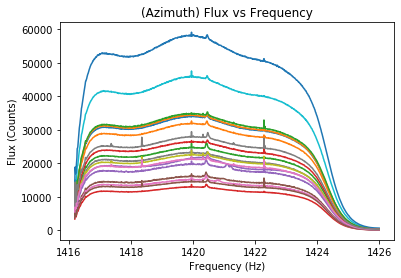

In [29]:
#azimuth plot
frequency = np.arange(1416,1426,0.009766)
for i in range(1,19):
    plt.plot(frequency[19:],az_spectra[i][19:])
    
plt.title('(Azimuth) Flux vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

In [30]:
az_flux_integrals = np.trapz(az_spectra, frequency)
# plt.scatter([-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9],az_flux_integrals)
plt.scatter([-1,-2,-3,-4,-5,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9],az_flux_integrals)

plt.title('(Azimuth) Flux Integrals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

Text(0, 0.5, 'Flux (Counts)')

Text(0, 0.5, 'Flux (Counts)')

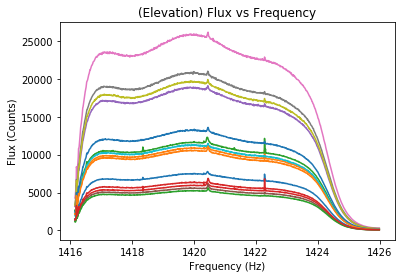

In [33]:
#elevation plot
frequency = np.arange(1416,1426,0.009766)
for i in range(1,15):
    plt.plot(frequency[15:],el_spectra[i][15:])
    
plt.title('(Elevation) Flux vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

In [28]:
el_flux_integrals = np.trapz(el_spectra, frequency)
plt.scatter([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9],el_flux_integrals)

plt.title('(Elevation) Flux Integrals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

Text(0, 0.5, 'Flux (Counts)')

Text(0, 0.5, 'Flux (Counts)')

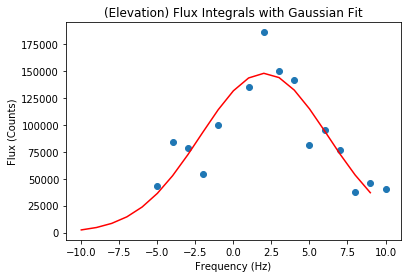

In [32]:
def gaussian(x,mu,sig,amp):
    return ((1/(np.sqrt(2*np.pi)*sig)) * (np.exp(-((x-mu)/sig)**2/2))) * amp

mu0,sig0,amp0 = (0,7,3000)

coeffs_el, fiterr = curve_fit(gaussian,np.array([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]),el_flux_integrals,p0 = (mu0,sig0,amp0))

plt.scatter([-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9],el_flux_integrals)
plt.plot(np.arange(-10,10,1), gaussian(np.arange(-10,10,1),coeffs_el[0],coeffs_el[1],coeffs_el[2]),'r-')

plt.title('(Elevation) Flux Integrals with Gaussian Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

In [13]:
coeffs_el[0]
#mu

2.02139469361911

In [14]:
coeffs_el[1]
#sigma

4.191870738410864

In [15]:
coeffs_el[2]
#amplitude

1554370.9294811636

In [16]:
#full width half max = #*gaussian
FWHM_el = 2.355*coeffs_el[1]
FWHM_el

9.871855588957585

Text(0, 0.5, 'Flux (Counts)')

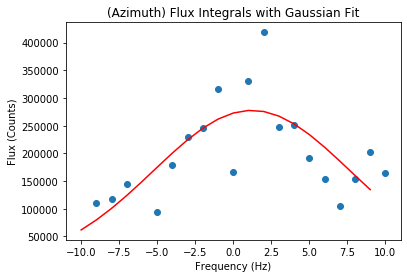

In [31]:
def gaussian(x,mu,sig,amp):
    return ((1/(np.sqrt(2*np.pi)*sig)) * (np.exp(-((x-mu)/sig)**2/2))) * amp

mu0,sig0,amp0 = (0,7,3000)

coeffs_az, fiterr = curve_fit(gaussian,np.array([-1,-2,-3,-4,-5,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]),az_flux_integrals,p0 = (mu0,sig0,amp0))

plt.scatter([-1,-2,-3,-4,-5,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9],az_flux_integrals)
plt.plot(np.arange(-10,10,1), gaussian(np.arange(-10,10,1),coeffs_az[0],coeffs_az[1],coeffs_az[2]),'r-')

plt.title('(Azimuth) Flux Integrals with Gaussian Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Counts)')

In [18]:
coeffs_az[0]
#mu

1.2145459583816745

In [19]:
coeffs_az[1]
#sigma

6.468487064741756

In [20]:
coeffs_az[2]
#amplitude

4501898.679204151

In [21]:
#full width half max = #*gaussian
FWHM_az = 2.355*coeffs_az[1]
FWHM_az

15.233287037466834